**Approach used**

First of all I read my csv file given in the question and then I calculated the sampling frequency which will be used for
filtering my ecg data (for filtering i used butterworth band pass filter beacuse i need to filter frequency in certain range) and finding peaks in the filtered signal so basically i am filtering my ecg data to remove unnecessary signal and noise
then i will find peaks in my filtered signal by selecting a certain range. I will used my peaks array to find time interval between peaks and by dividing 60 by time interval will give me my heart rate array then i find the mean of that array to find the Mean heart rate.
    

In [9]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks, butter, filtfilt
import matplotlib.pyplot as plt

Mean Heart Rate: 90.75 BPM


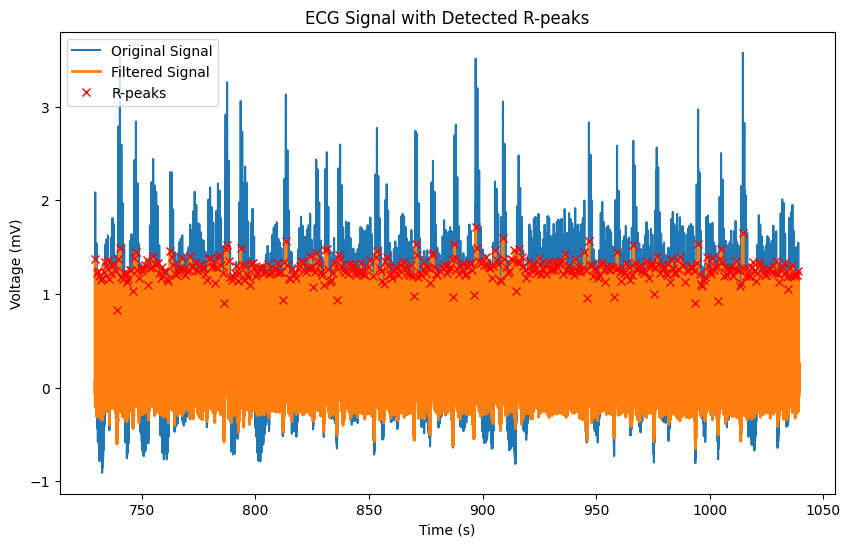

In [10]:
# This is a function for reading our given csv file which return the values of time and ecg 
def load_ecg_data(file_path): 
    data = pd.read_csv(file_path)
    return data['time'].values, data['ecg'].values

# This is a function for filtering the ecg signal 
# Approach of this function:- so in this function i am taking the raw emg and weakning the certain range of frequency of i choose that frequency above 45
# and below 0.5 to wekened them this is because they are considered as noice frquency .
def preprocess_ecg(signal, fs):
    # Design a Butterworth bandpass filter
    lowcut = 0.5  # Lower bound of the frequency (Hz)
    highcut = 45.0  # Upper bound of the frequency (Hz)
    
    Nyquist = 0.5 * fs 

    #normalizing the low and high by dividing with nyquist frequency
    low = lowcut / Nyquist
    high = highcut / Nyquist

    #using butterworth bandpass filter
    b, a = butter(1, [low, high], btype='band') # it return two array a and b which act as a coefficent in our Zero phase filtering
    
    filtered_signal = filtfilt(b, a, signal) # using Zero phase filtering it applies filter in both forward and reverse direction
    return filtered_signal

# This function is used for detecting the peaks in our filtered ecg signal
def detect_peaks(filtered_signal, fs):
    # Detect R-peaks in the ECG signal
    distance = int(0.6 * fs)  # Minimum distance between peaks which is usually in 0.6 seconds interval
    
    peaks, _ = find_peaks(filtered_signal, distance=distance) # it is a function from scipy for finding local maxima within certain range which is distance here.
    
    return peaks

def calculate_heart_rate(peaks, fs):
    # Calculate heart rate from R-peak intervals
    
    rr_intervals = np.diff(peaks) / fs  # Time intervals between consecutive R-peaks in seconds by dividing difference in peak by frequency
    
    heart_rates = 60 / rr_intervals  # Convert to beats per minute
    
    mean_heart_rate = np.mean(heart_rates) #finding mean of heart_rates array
    return mean_heart_rate, heart_rates



file_name = 'sam_ECG.csv'  #definig variable as file_name which is our file name

# Loading our ECG data from the file
time, ecg = load_ecg_data(file_name)

# Sampling frequency (fs) estimation by using f=1/time and here we are using mean time of the difference between the time of present row to the previous row 
fs = 1 / np.mean(np.diff(time))

# we are passing the ECG signal to our preprocess_ecg function for pre processing which will return filtered_signal.
filtered_signal = preprocess_ecg(ecg, fs)

# peaks represent the local maxima within range of given dataset
peaks = detect_peaks(filtered_signal, fs)

# Calculate mean heart rate
mean_hr, heart_rates = calculate_heart_rate(peaks, fs)

print(f"Mean Heart Rate: {mean_hr:.2f} BPM")

# Ploting  the results
plt.figure(figsize=(10, 6))
plt.plot(time, ecg, label='Original Signal')
plt.plot(time, filtered_signal, label='Filtered Signal', linewidth=2)
plt.plot(time[peaks], filtered_signal[peaks], 'rx', label='R-peaks')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.title('ECG Signal with Detected R-peaks')
plt.legend()
plt.show()



